In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.animation as animation
import time
import struct
import tensorflow as tf
import random as rd

from array import array
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

# my project
from module.conf import PROJECT_DIR

# %matplotlib tk
%matplotlib inline


1. Load data:
- Train data: 60k 28x28 images
- Test data: 

In [2]:
mnist_path = "/data/sample/mnist"
training_images_filepath = "".join([PROJECT_DIR, mnist_path, "/train-images.idx3-ubyte"])
training_labels_filepath = "".join([PROJECT_DIR, mnist_path, "/train-labels.idx1-ubyte"])
test_images_filepath = "".join([PROJECT_DIR, mnist_path, "/t10k-images.idx3-ubyte"])
test_labels_filepath = "".join([PROJECT_DIR, mnist_path, "/t10k-labels.idx1-ubyte"])

def read_images_labels(images_filepath, labels_filepath) -> tuple:
    labels = []
    with open(labels_filepath, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        if magic != 2049:
            raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
        # labels = array("B", file.read())
        labels = array("B", file.read())

    with open(images_filepath, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        if magic != 2051:
            raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
        image_data = array("B", file.read())       
     
    images = []
    # for i in range(size):
    #     images.append([0] * rows * cols)
    for i in range(size):
        img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
        img = img.reshape(28, 28)
        # images[i][:] = img
        images.append(img)
    
    return images, labels

def load_data() -> tuple:
    x_train, y_train = read_images_labels(training_images_filepath, training_labels_filepath)
    x_test, y_test = read_images_labels(test_images_filepath, test_labels_filepath)
    return (x_train, y_train),(x_test, y_test)

(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
# print(f"{type(X_train[0])}")
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
X_train = np.asarray(X_train)/255
y_train = np.asarray(y_train)
X_test  = np.asarray(X_test)/255
y_test  = np.asarray(y_test)

In [5]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28, 28,)),
    tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu),
    # tf.keras.layers.Dense(units=128, activation=tf.keras.activations.hard_sigmoid),
    # tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10)
])

In [6]:
# predictions = model(X_train[0]).numpy()
# predictions
# tf.nn.softmax(predictions).numpy()

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn = tf.keras.losses.mae
# model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.FalseNegatives()])
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
              loss=loss_fn,
              metrics=["accuracy"])

In [8]:
# X_train, X_test = np.asarray(X_train) / 255.0, np.asarray(X_test) / 255.0
# print(X_test)
model.fit(X_train, y_train, epochs=24)

Epoch 1/24
   1/1875 [..............................] - ETA: 4:39 - loss: 2.3795 - accuracy: 0.0625

2023-07-28 20:52:40.362753: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 497us/step - loss: 0.3611 - accuracy: 0.8992
Epoch 2/24
1875/1875 [==============================] - 1s 511us/step - loss: 0.1987 - accuracy: 0.9437
Epoch 3/24
1875/1875 [==============================] - 1s 491us/step - loss: 0.1540 - accuracy: 0.9552
Epoch 4/24
1875/1875 [==============================] - 1s 489us/step - loss: 0.1276 - accuracy: 0.9625
Epoch 5/24
1875/1875 [==============================] - 1s 467us/step - loss: 0.1106 - accuracy: 0.9671
Epoch 6/24
1875/1875 [==============================] - 1s 485us/step - loss: 0.0982 - accuracy: 0.9702
Epoch 7/24
1875/1875 [==============================] - 1s 541us/step - loss: 0.0879 - accuracy: 0.9732
Epoch 8/24
1875/1875 [==============================] - 1s 513us/step - loss: 0.0803 - accuracy: 0.9758
Epoch 9/24
1875/1875 [==============================] - 1s 524us/step - loss: 0.0739 - accuracy: 0.9779
Epoch 10/24
1875/1875 [==============================] - 1s 511us/step - lo

In [12]:
model.evaluate(X_test,  y_test, verbose=2)
c = 0
for i in range(100):
    test_indx = rd.randint(0, len(y_test)-1)
    x_test_ = np.asarray([X_test[test_indx]])

    # test_indx = rd.randint(0, len(y_train)-1)
    # x_test_ = np.asarray([X_train[test_indx]])

    result = model.predict(x=x_test_, verbose=0)
    y_test_ = y_test
    if result.argmax() != y_test_[test_indx]:
        c+=1
        print(f"- [{i}]:img[{test_indx}]:{result}\npredict:{result.argmax()} solve:{y_test_[test_indx]}")
print(f"error: {c}")

313/313 - 0s - loss: 0.1298 - accuracy: 0.9695 - 123ms/epoch - 394us/step
- [12]:img[3330]:[[-10.875591   -16.38675      0.69379157   3.8346877  -38.296505
  -14.532145   -16.877678   -13.95973      3.3688135   -8.639976  ]]
predict:3 solve:2
- [72]:img[381]:[[-12.176191  -13.371866   -1.4244484   6.42141   -10.595364  -18.23315
  -17.180119    8.301395   -4.7636094  -7.1644473]]
predict:7 solve:3
error: 2


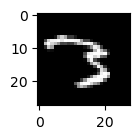

In [13]:
def show_image(img_data: np.ndarray) -> tuple:
    fig, axes = plt.subplots(figsize=(1.60, 1.20))
    axes.imshow(X=img_data, cmap="gray")
    return fig, axes

# print(y_test[5854])
show_image(X_test[381])
plt.show()

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices('TPU'))

Num GPUs Available:  0
